# Image Augmentation- Albumentations

## Written by: Rodrigo Escandon

# Executive Summary

This notebook displays steps that can be taken to augment images using Albumentations. This process allows the modeler to artificially expand the available dataset when training it in a deep learning model. As well as, making the model less bias and more resilient to changes such as image quality.

In [1]:
import albumentations as A
import cv2 as cv
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

Text(0.5,1,'Dog & Bike')

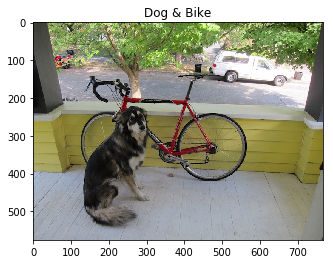

In [2]:
#Loading image and displaying
image=cv.imread('.\\dog.jpg')
image=cv.cvtColor(image,cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Dog & Bike')

Text(0.5,1,'Resized')

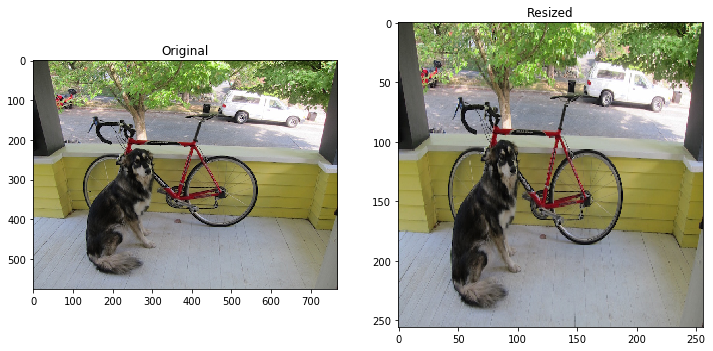

In [3]:
#Resizing image to 256x256
image_rz=A.Resize(256,256)
image_rz=image_rz(image=image)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,12))
ax1.imshow(image)
ax1.set_title('Original')
ax2.imshow(image_rz['image'])
ax2.set_title('Resized')

Text(0.5,1,'Random_Crop')

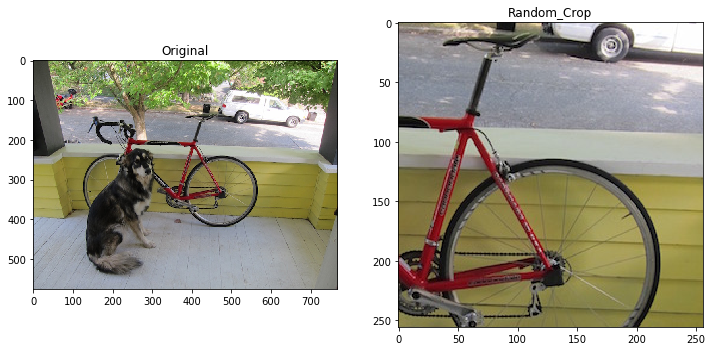

In [4]:
#Randomly crop image to 256X256
image_rc=A.RandomCrop(256,256)
image_rc=image_rc(image=image)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,12))
ax1.imshow(image)
ax1.set_title('Original')
ax2.imshow(image_rc['image'])
ax2.set_title('Random_Crop')

Text(0.5,1,'Padded_Image')

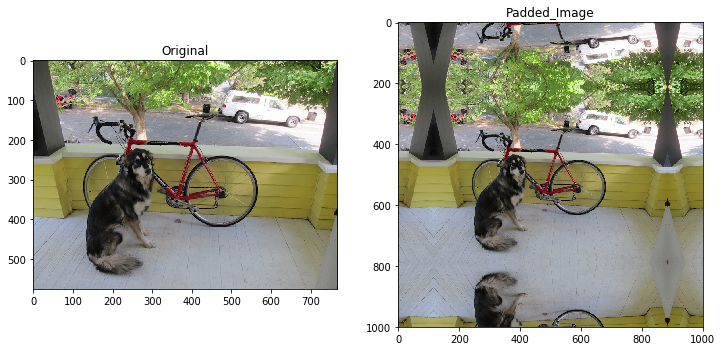

In [5]:
#Pad image to increase size of image from  to 1000x1000
image_pd=A.PadIfNeeded(min_height=1000, min_width=1000)
image_pd=image_pd(image=image)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,12))
ax1.imshow(image)
ax1.set_title('Original')
ax2.imshow(image_pd['image'])
ax2.set_title('Padded_Image')

Text(0.5,1,'Horizontal_Image')

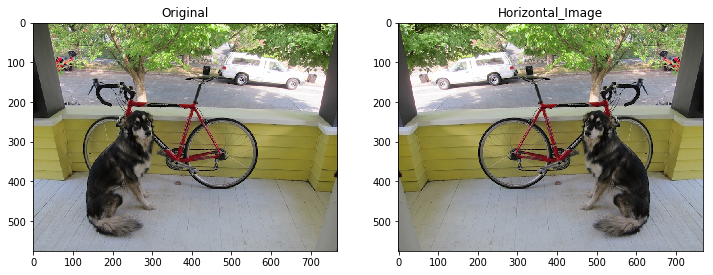

In [6]:
#Performing horizontal flip on image
image_hf=A.HorizontalFlip(p=1)
image_hf=image_hf(image=image)
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,12))
ax1.imshow(image)
ax1.set_title('Original')
ax2.imshow(image_hf['image'])
ax2.set_title('Horizontal_Image')

Text(0.5,1,'Vertical_Image')

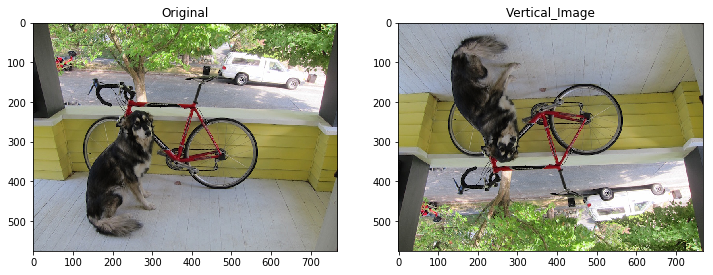

In [7]:
#Performing vertical flip on image
image_vf=A.VerticalFlip(p=1)
image_vf=image_vf(image=image)
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,12))
ax1.imshow(image)
ax1.set_title('Original')
ax2.imshow(image_vf['image'])
ax2.set_title('Vertical_Image')

Text(0.5,1,'RandomRotate_Image')

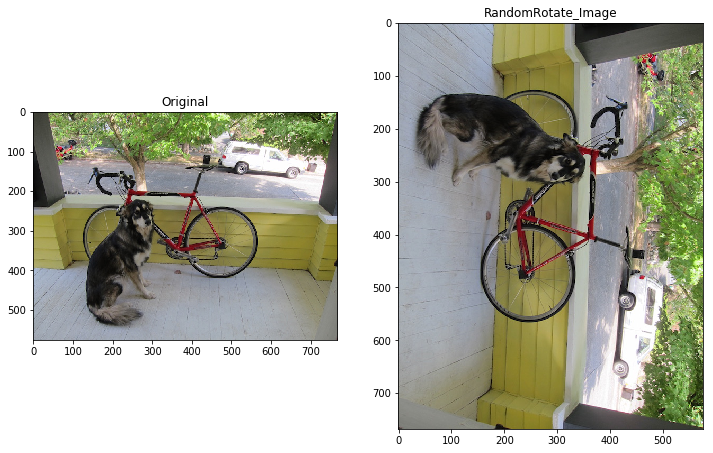

In [8]:
#Performing a random 90 degree flip on image
image_rr=A.RandomRotate90(p=1)
image_rr=image_rr(image=image)
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,12))
ax1.imshow(image)
ax1.set_title('Original')
ax2.imshow(image_rr['image'])
ax2.set_title('RandomRotate_Image')

Text(0.5,1,'Mult_Transform_Image')

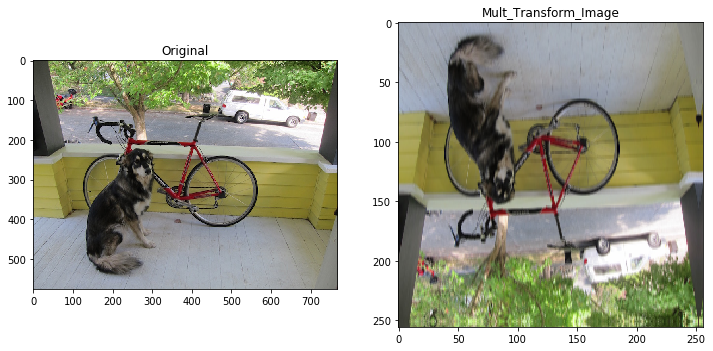

In [9]:
#Performing multiple transformations on image such as resize (256x256), motion blurring, and a vertical flip
image_tran=A.Compose([A.Resize(256,256),A.MotionBlur(blur_limit=[10,10],always_apply=True,p=1),A.VerticalFlip(p=1)])
image_tran=image_tran(image=image)
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,12))
ax1.imshow(image)
ax1.set_title('Original')
ax2.imshow(image_tran['image'])
ax2.set_title('Mult_Transform_Image')

Text(0.5,1,'Mult_Transform_OneOf_Image')

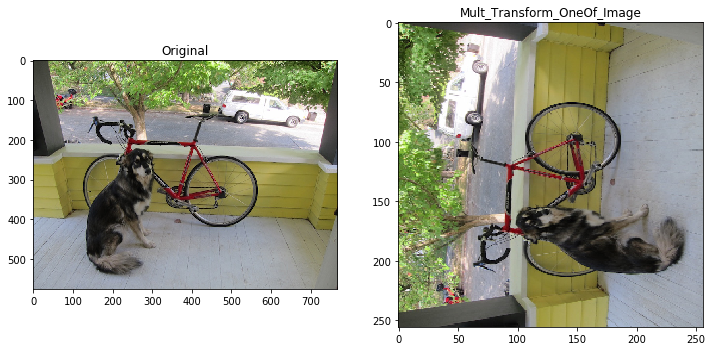

In [11]:
#Performing multiple transformation on image such as resize (256x256), one of (flips and rotations) and 
#one of (blur, crop or padding)
image_tran_oneof=A.Compose([A.Resize(256,256),
                           A.OneOf([A.HorizontalFlip(p=1),
                                   A.VerticalFlip(p=1),
                                   A.RandomRotate90(p=1)],p=1),
                          A.OneOf([A.MotionBlur(blur_limit=[10,10],always_apply=True,p=1),
                                  A.RandomCrop(256,256),
                                   A.PadIfNeeded(min_height=1000,min_width=1000)],p=1)])
image_tran_oneof=image_tran_oneof(image=image)
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,12))
ax1.imshow(image)
ax1.set_title('Original')
ax2.imshow(image_tran_oneof['image'])
ax2.set_title('Mult_Transform_OneOf_Image')